## Agenda 
1. AR Models
2. MA Models
3. ARMA Models
4. ARIMA Models

## Autoregressive Models (AR)

An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.

In words, the mathematical idea is the following:

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$\large Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

In [89]:
# Make Some Data
import numpy as np
import pandas as pd
np.random.seed(11)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

#### AR(2)

Today = constant + slope_1 x yesterday + slope_2 x 2_days_ago + noise 

## MA Models 

The Moving Average model can be described as the weighted sum of today's and yesterday's noise.

In words, the mathematical idea is the following:

Today = Mean + Noise + Slope×yesterday's noise
 
Or, mathematically:

$$\large 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1$$

In [134]:
# create data 
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

## ARMA

Combines both AR and MA components into one model.

$$\large𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜃∗𝜖𝑡−1 + 𝜖𝑡$$

In [144]:
# Make data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

## ARIMA

Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [150]:
# create data
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

## Finding Correct Value for ARIMA 

In [172]:
p = [0, 1, 2]
q = [0, 1, 2]

for ar in p:
    for ma in q:
        try:
            arima_model = ARIMA(time_series, order = (ar, 1, ma)).fit()
            print(f'({ar}, 1, {ma}) - AIC: {arima_model.aic}')
        except:
            continue

(0, 1, 0) - AIC: 421.12590712736636
(0, 1, 1) - AIC: 368.430487287069
(1, 1, 0) - AIC: 404.1467176254963
(1, 1, 1) - AIC: 369.71288922212284
(1, 1, 2) - AIC: 357.4697965668273
(2, 1, 0) - AIC: 372.5288681300175
(2, 1, 1) - AIC: 369.14613615871866
(2, 1, 2) - AIC: 358.9442380334676


## ACF and PACF 

Auto-correlation function (ACF)

- Measures relationship between points and various lags.

Partial auto-correlation function (PACF)

- Measures relationship between points and various lags without the influence of other lags.

| Plot | AR(p) | MA(q) | ARMA(p, q) | 
|------|-------|------|-------|
| ACF    | Tails off | Cuts off after lag q   | Tails Off  | 
| PACF    | Cuts off after lag p  | Tails off   | Tails off  | 

Look at a AR(1) time series.  The PACF should show that it tails off after lag 1 

In [83]:
# AR(1)
n = 12*10
constant = 8
slope = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(constant + slope*(data[i-1]-constant) + noise[i] if i>1 else constant + slope + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

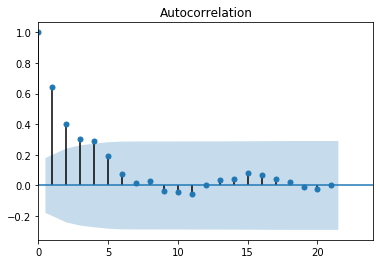

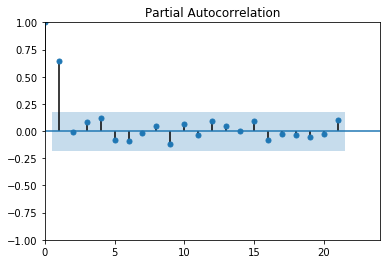

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

Now looking at a MA(1) model.  ACF should tail off after 1 lag 

In [85]:
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

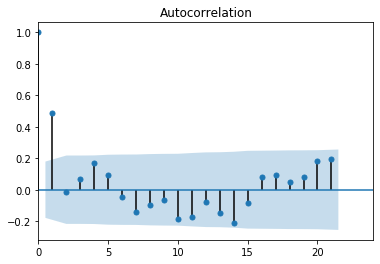

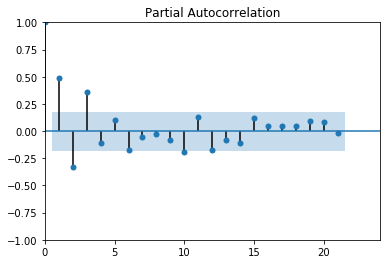

In [86]:
plot_acf(time_series); plt.xlim(0,24); plt.show()
plot_pacf(time_series); plt.xlim(0,24); plt.ylim(-1,1);plt.show()